For the reviewer, looking at the tides beyond the one point

In [1]:
import arrow
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import xarray as xr

%matplotlib inline

In [2]:
basedir = '/results2/SalishSea/nowcast-green.202111/'
iY = 344; iX = 276; iZ = 10 

In [3]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()
    if i == 0:
        velocity_year = velocity.copy(deep=True)
        velocity.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        velocity.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


### Total velocity, v component too.

In [4]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_V.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    v_vel = xr.open_dataset(fullfile)
    v_velocity = v_vel['vomecrty'].isel(y=[iY-1, iY], x=iX).sel(depthv=iZ, method='nearest').mean(axis=1)
    vv = velocity**2 + v_velocity**2
    if i == 0:
        velocity_year = velocity.copy(deep=True)
        vv_year = vv.copy(deep=True)
        velocity.close()
        v_velocity.close()
        vv.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        vv_year = xr.concat([vv_year, vv], dim='time_counter')
        velocity.close()
        v_velocity.close()
        vv.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


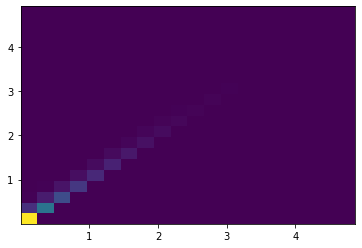

In [5]:
plt.hist2d(velocity_year**2, vv_year, bins=20);

In [6]:
y = vv_year.values
x = velocity_year.values**2

nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[[1.         0.99388073]
 [0.99388073 1.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.019e+06
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                        0.00
Time:                        16:15:24   Log-Likelihood:                          9533.0
No. Observations:                8760   AIC:                                 -1.906e+04
Df Residuals:                    8759   BIC:                                 -1.906e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0527      0.001   1009.298      0.000       1.051       1.055
==============================================================================
Omnibus:                     4390.688   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46320.621
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      13.402   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer

Highly correlated (R2 = 0.991) with a coefficient of 1.053pm0.002

### Max each day instead of the average of the square

In [10]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_V.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    v_vel = xr.open_dataset(fullfile)
    v_velocity = v_vel['vomecrty'].isel(y=[iY-1, iY], x=iX).sel(depthv=iZ, method='nearest').mean(axis=1)
    vv = (velocity**2 + v_velocity**2).max(axis=0)
    if i == 0:
        velocity_year = velocity.copy(deep=True)
        vv_year = vv.copy(deep=True)
        velocity.close()
        v_velocity.close()
        vv.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        vv_year = xr.concat([vv_year, vv], dim='time_counter')
        velocity.close()
        v_velocity.close()
        vv.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


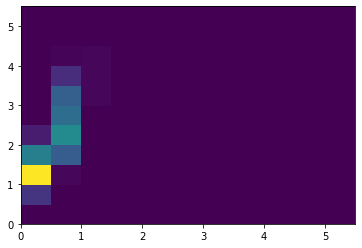

In [11]:
#plt.plot(velocity_year**2, marker= 'o')
#plt.plot(24*np.arange(365), vv_year, marker= 'o')
daily = (velocity_year**2).resample(time_counter='1D').mean()
#plt.plot(24*np.arange(365), daily, marker = 'o')
#plt.plot(daily, vv_year, 'o')
day_avg_tide_pd = daily.to_dataframe()
previous = day_avg_tide_pd.rolling(4, center=True).mean()
new_pd = vv_year.to_dataframe(name='vv_year')
new = new_pd.rolling(4, center=True).mean()
plt.hist2d(previous.vozocrtx, new.vv_year, bins=np.arange(0, 6, 0.5));

In [12]:
y = new.vv_year.values
x = previous.vozocrtx.values

nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[[1.         0.91955293]
 [0.91955293 1.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.596e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                   6.93e-301
Time:                        18:01:48   Log-Likelihood:                         -100.88
No. Observations:                 362   AIC:                                      203.8
Df Residuals:                     361   BIC:                                      207.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6310      0.029    126.346      0.000       3.574       3.688
==============================================================================
Omnibus:                        6.348   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                8.397
Skew:                          -0.127   Prob(JB):                       0.0150
Kurtosis:                       3.702   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer

Daily maximum velocity rolling averaged over 4 days is well correlated with the mean velocity squared rolling average over 4 days. However, the coefficient is 3.63pm0.06

### Depth Average

In [5]:
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
umask = meshmask.umask[0]
meshmask.close()

In [8]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX)
    u_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_V.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    v_vel = xr.open_dataset(fullfile)
    v_velocity = v_vel['vomecrty'].isel(y=[iY-1, iY], x=iX).mean(axis=2)
    v_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_T.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    gridT = xr.open_dataset(fullfile)
    e3u = gridT['e3t'].isel(y=iY, x=[iX-1, iX]).min(axis=2)
    e3u = e3u.rename({'deptht': 'z'})
    velocity = velocity.rename({'depthu': 'z'})
    v_velocity = v_velocity.rename({'depthv': 'z'})
    vs = (velocity**2 + v_velocity**2)
    va = (vs * e3u).where(umask[:, iY, iX] == 1).sum(axis=1) / (e3u.where(umask[:, iY, iX] == 1).sum(axis=1))
    vv = va.max(axis=0)
    if i == 0:
        vv_year = vv.copy(deep=True)
        velocity.close()
        v_velocity.close()
        vv.close()
    else:
        vv_year = xr.concat([vv_year, vv], dim='time_counter')
        velocity.close()
        v_velocity.close()
        vv.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


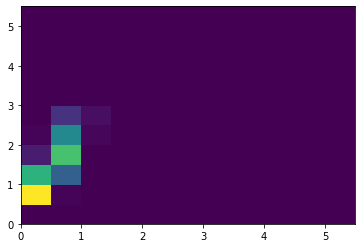

In [16]:
daily = (velocity_year**2).resample(time_counter='1D').mean()
day_avg_tide_pd = daily.to_dataframe()
previous = day_avg_tide_pd.rolling(4, center=True).mean()
new_pd = vv_year.to_dataframe(name='vv_year')
new = new_pd.rolling(4, center=True).mean()
plt.hist2d(previous.vozocrtx, new.vv_year, bins=np.arange(0, 6, 0.5));

In [18]:
y = new.vv_year.values
x = previous.vozocrtx.values

nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

model12 = sm.OLS(y, x, missing='drop').fit()
model12.summary()

[[1.         0.89790163]
 [0.89790163 1.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.253e+04
Date:                Tue, 18 Jun 2024   Prob (F-statistic):                   2.33e-282
Time:                        13:42:06   Log-Likelihood:                         -27.453
No. Observations:                 362   AIC:                                      56.91
Df Residuals:                     361   BIC:                                      60.80
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6261      0.023    111.926      0.000       2.580       2.672
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.928
Skew:                          -0.028   Prob(JB):                        0.629
Kurtosis:                       2.758   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer ###

Daily maximum depth-averaged velocity rolling averaged over 4 days is well correlated (0.90) with the mean u-velocity squared rolling average over 4 days. The coefficient is 2.63pm0.04


## Now Look at a Point in Haro Strait ##

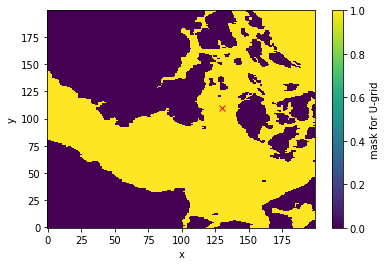

In [32]:
umask[0, 200:400, 100:300].plot()
plt.plot(130, 110, 'rx');
jY = 200+110; jX = 100+130;

In [34]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=jY, x=jX)
    u_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_V.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    v_vel = xr.open_dataset(fullfile)
    v_velocity = v_vel['vomecrty'].isel(y=[jY-1, jY], x=jX).mean(axis=2)
    v_vel.close()
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_T.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    gridT = xr.open_dataset(fullfile)
    e3u = gridT['e3t'].isel(y=jY, x=[jX-1, jX]).min(axis=2)
    e3u = e3u.rename({'deptht': 'z'})
    velocity = velocity.rename({'depthu': 'z'})
    v_velocity = v_velocity.rename({'depthv': 'z'})
    vs = (velocity**2 + v_velocity**2)
    va = (vs * e3u).where(umask[:, jY, jX] == 1).sum(axis=1) / (e3u.where(umask[:, jY, jX] == 1).sum(axis=1))
    vh = va.max(axis=0)
    if i == 0:
        vh_year = vh.copy(deep=True)
        velocity.close()
        v_velocity.close()
        vh.close()
    else:
        vh_year = xr.concat([vh_year, vh], dim='time_counter')
        velocity.close()
        v_velocity.close()
        vh.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
320
330
340
350
360


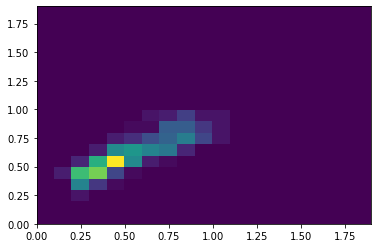

In [37]:
new_pd = vh_year.to_dataframe(name='vh_year')
new = new_pd.rolling(4, center=True).mean()
plt.hist2d(previous.vozocrtx, new.vh_year, bins=np.arange(0, 2, 0.1));

In [38]:
y = new.vh_year.values
x = previous.vozocrtx.values

nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

model13 = sm.OLS(y, x, missing='drop').fit()
model13.summary()

[[1.         0.86823385]
 [0.86823385 1.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              8108.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                   1.94e-249
Time:                        09:58:02   Log-Likelihood:                          223.78
No. Observations:                 362   AIC:                                     -445.6
Df Residuals:                     361   BIC:                                     -441.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0555      0.012     90.045      0.000       1.032       1.079
==============================================================================
Omnibus:                       19.941   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.292
Skew:                          -0.606   Prob(JB):                     1.44e-05
Kurtosis:                       2.917   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
velsquared = velocity * velocity
velsquared

<xarray.Dataset>
Dimensions:        (time_counter: 35064)
Coordinates:
    nav_lat        float32 48.74564
    depthu         float32 9.502433
    nav_lon        float32 -123.106224
    time_centered  (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
  * time_counter   (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
Data variables:
    vozocrtx       (time_counter) float32 1.5254081 1.7519335 ... 1.4587202

In [18]:
day_avg_tide_vel = velsquared.resample(time_counter='1D').mean()

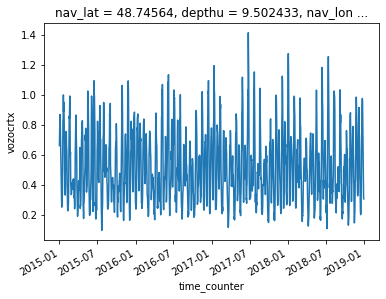

In [20]:
day_avg_tide_vel.vozocrtx.plot();

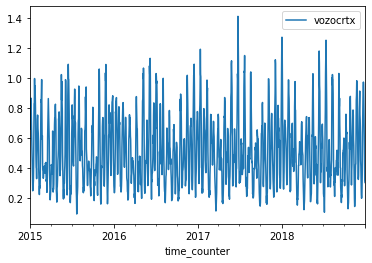

In [25]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depthu', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lat', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lon', 1)
day_avg_tide_pd.to_csv('day_avg_tide_pd.csv')
day_avg_tide_pd.plot()

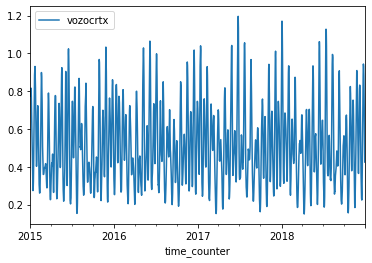

In [30]:
low_pass_tide = day_avg_tide_pd.rolling(4, center=True).mean()
low_pass_tide.to_csv('low_pass_tide.csv')
low_pass_tide.plot()

In [31]:
velocity2015.close()
velocity2016.close()
velocity2017.close()
velocity2018.close()